#### Import packages used in a typical deep learning workflow.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

#### Load the images in the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) database, rescale values from 0 to 255 to 0 to 1, divide the training dataset into a training dataset and validation dataset, and display a sample of images from the training dataset.

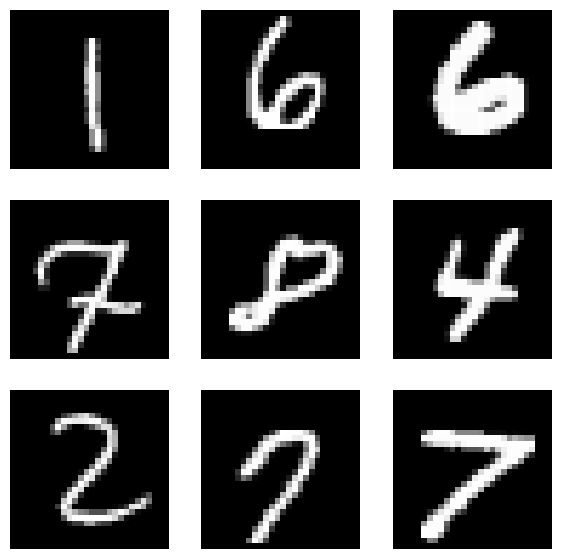

In [ ]:
# Load the images in the MNIST database.
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Rescale pixel values of images from 0 to 255 to 0 to 1.
X_train, X_test = X_train/255, X_test/255

# Divide the training data set into a training data set and a validation
# data set.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.1,
                                                  random_state=42)

# Display a sample of images from the training dataset.
fig, axs = plt.subplots(3, 3)
fig.set_size_inches((7, 7))
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(X_train[i*3+j], cmap='gray')
        axs[i,j].axis('off')
fig.show()

#### Define and compile the model.

In [ ]:
# Define a model having an input layer that processes flattened 28 x 28 images,
# a hidden layer having 128 nodes, and an output layer having ten nodes that
# correspond to the digits 0, 1, 2, ..., 9.  The hidden layer has ReLU
# activation.  The output layer has softmax activation.
model = keras.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model.  Use sparse categorical cross entropy as the loss function
# (to measure closeness of predicted image labels to actual image labels).
# Minimize the loss function using the Adam optimizer.  Measure performance
# using accuracy, which is (# correct predictions)/(# images).
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Train the model (this step is in a separate code cell because it has a moderately long run time).

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8822 - loss: 0.4211 - val_accuracy: 0.9688 - val_loss: 0.1097
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9640 - loss: 0.1202 - val_accuracy: 0.9787 - val_loss: 0.0714
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9772 - loss: 0.0763 - val_accuracy: 0.9817 - val_loss: 0.0572
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9839 - loss: 0.0532 - val_accuracy: 0.9903 - val_loss: 0.0345
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9881 - loss: 0.0415 - val_accuracy: 0.9913 - val_loss: 0.0287
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9903 - loss: 0.0325 - val_accuracy: 0.9933 - val_loss: 0.0219
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9922 - loss: 0.0255 - val_accuracy: 0.9967 - val_loss: 0.0157
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9933 - loss: 0.0222 -

#### Assess the performance of the model and plot the training history as accuracy vs epoch.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9763 - loss: 0.0889
Test Accuracy: 0.9801


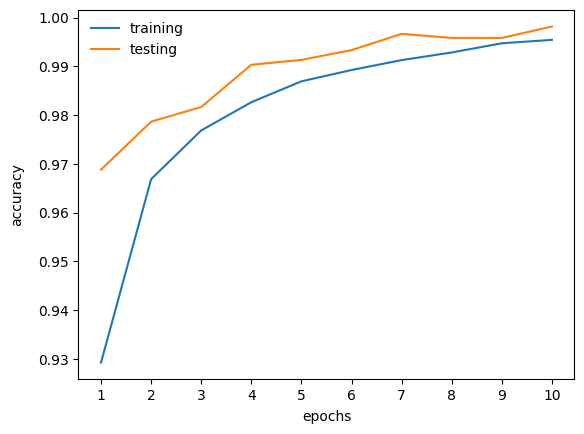

In [ ]:
# Evaluate the performance of the model.
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot the training history as accuracy vs epoch.
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='training')
ax.plot(history.history['val_accuracy'], label='testing')
ax.set_xticks(range(10))
ax.set_xticklabels(list(range(1,11)))
ax.set_xlabel('epochs', labelpad=5)
ax.set_ylabel('accuracy', labelpad=10)
ax.legend(loc='best', frameon=False)
fig.show()

#### Predict digits for images in the testing dataset and display a small selection of the predictions.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


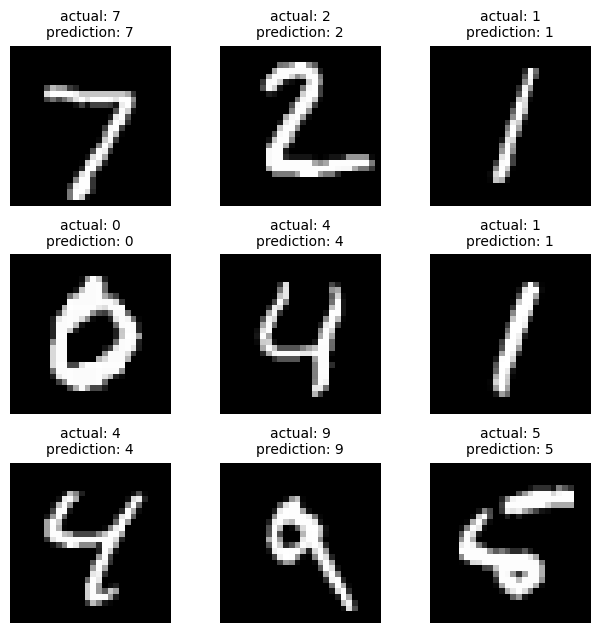

In [ ]:
# Predict digits for images in the test dataset.
predictions = model.predict(X_test)

# Display the first nine digits and their actual and predicted values.
fig, axs = plt.subplots(3, 3)
fig.set_size_inches((7.5, 7.5))
for i in range(3):
    for j in range(3):
        title1 = f'actual: {y_test[i*3+j]}'
        title2 = f'prediction: {np.argmax(predictions[i*3+j])}'
        axs[i,j].imshow(X_test[i*3+j], cmap='gray')
        axs[i,j].set_title(title1 + '\n' + title2,
                           fontsize=10)
        axs[i,j].axis('off')
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.show()

In [ ]:
a_tuple = (3, 4)
type(a_tuple)
print(a_tuple[0])
#a_tuple[0] = 5
a_list = [3, 4]
print(a_list)
a_list[0] = 5
print(a_list)
list(a_tuple)
tuple(a_list)

3
[3, 4]
[5, 4]


(5, 4)

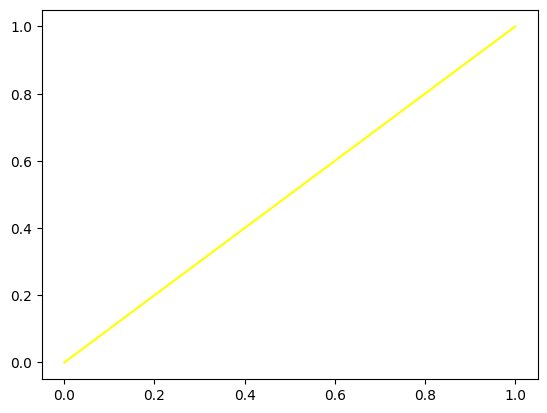

In [ ]:
gray = 1
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], color=((1,1,0)))
fig.show()